In [1]:
import tensorflow.keras as tf
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


To retrain the model, I've picked three epochs in this case.

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Checking the Data

In [3]:
train_labels[0]

max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


Preparing the Data

Using multi-hot encoding to encode integer sequences.


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_training = vectorize_sequences(train_data)
x_testing = vectorize_sequences(test_data)

In [6]:
x_training[0]

y_training = np.asarray(train_labels).astype("float32")
y_testing = np.asarray(test_labels).astype("float32")

Building the Model

Definition of the Model

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
# # In this case, I'm using two hidden layers, each with sixteen nodes, and one output layer node for either a +ve or -ve output. Hidden is handled by ReLu.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

The loss function is binary crossentropy, and Adam serves as the optimizer.


In [8]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Verifying the approach

Considering a validation set aside

In [10]:
x_value = x_training[:10000]
partial_x_training = x_training[10000:]
y_value = y_training[:10000]
partial_y_training = y_training[10000:]

Training the Model

We use 512 batches and 20 epochs to train the model.

In [11]:
history = model.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 7s 180ms/step - loss: 0.5503 - accuracy: 0.7778 - val_loss: 0.4046 - val_accuracy: 0.8600
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3076 - accuracy: 0.8979 - val_loss: 0.2990 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2093 - accuracy: 0.9307 - val_loss: 0.2767 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1570 - accuracy: 0.9515 - val_loss: 0.2790 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1214 - accuracy: 0.9647 - val_loss: 0.2916 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0949 - accuracy: 0.9752 - val_loss: 0.3106 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0746 - accuracy: 0.9836 - val_loss: 0.3353 - val_accuracy: 0.8785
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss.

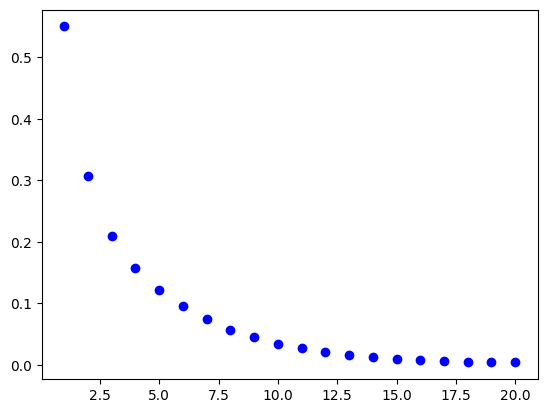

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")

Plotting the training and the validation accuracy

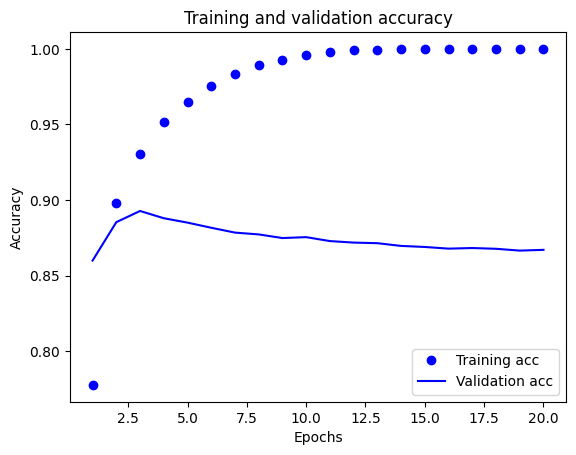

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

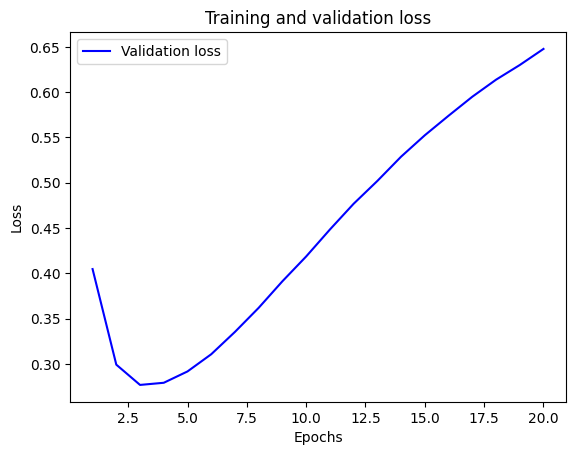

In [14]:
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Retraining the model from the beginning

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#To retrain the model, I've chosen three epochs in this instance.
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_training, y_training, epochs=4, batch_size=512)
results = model.evaluate(x_testing, y_testing)

results

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.5111 - accuracy: 0.7917
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2629 - accuracy: 0.9072
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1890 - accuracy: 0.9339
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3054 - accuracy: 0.8818


[0.3054184317588806, 0.8817999958992004]

Constructing the Model

1 utilizing two or three hidden layers and observe how it affects the validation and test accuracy

In [16]:
model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model1_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Model fitting with 20 epochs and 512 batch size

In [19]:
history1_1 = model1_1.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

history1_3 = model1_3.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5148 - accuracy: 0.7929 - val_loss: 0.3855 - val_accuracy: 0.8620
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3050 - accuracy: 0.9013 - val_loss: 0.3137 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2335 - accuracy: 0.9279 - val_loss: 0.2892 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1920 - accuracy: 0.9421 - val_loss: 0.2811 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1623 - accuracy: 0.9534 - val_loss: 0.2792 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1403 - accuracy: 0.9617 - val_loss: 0.2809 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1222 - accuracy: 0.9665 - val_loss: 0.2866 - val_accuracy: 0.8860
Epoch 8/20
30

Plotting the training Vs validation data

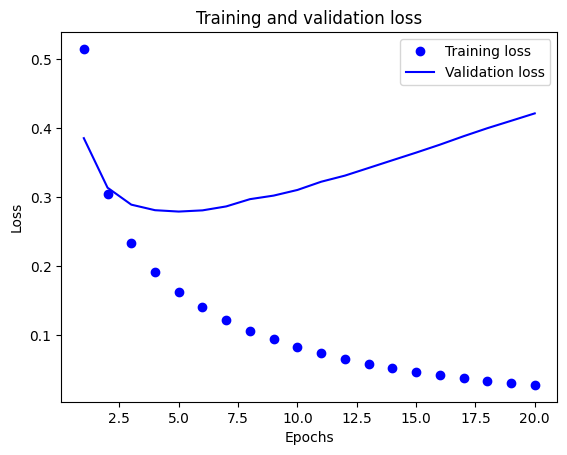

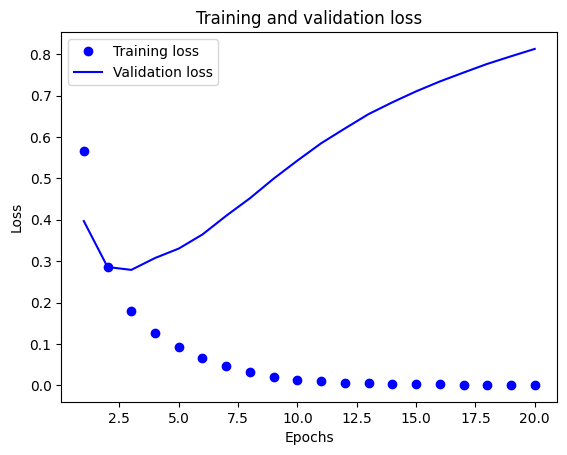

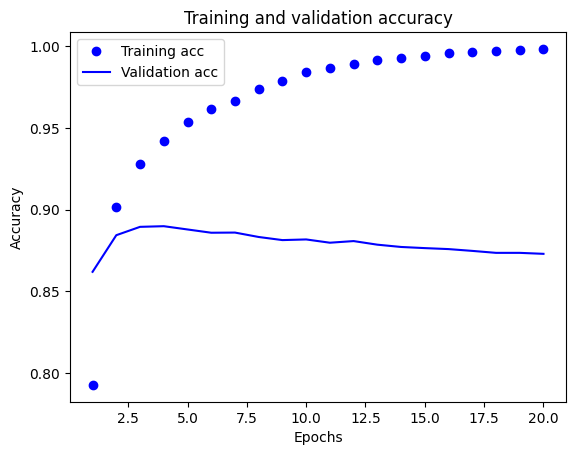

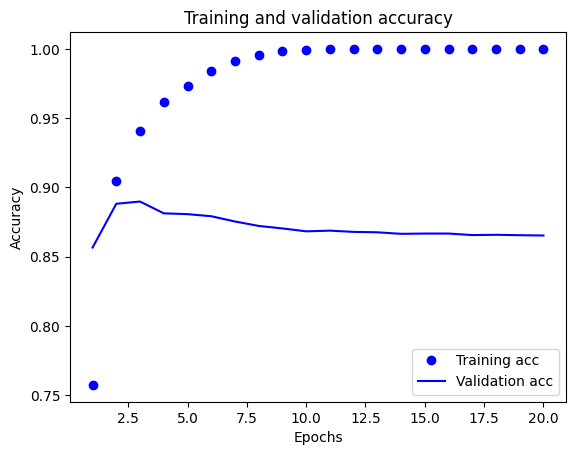

In [20]:
historyp1_1 = history1_1.history
historyp1_1.keys()

historyp1_3 = history1_1.history
historyp1_3.keys()

historyp1_1 = history1_1.history
loss_values1 = historyp1_1["loss"]
val_loss_values1 = historyp1_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

historyp1_3 = history1_3.history
loss_values3 = historyp1_3["loss"]
val_loss_values3 = historyp1_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc1 = historyp1_1["accuracy"]
val_acc1 = historyp1_1["val_accuracy"]
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.clf()
acc3 = historyp1_3["accuracy"]
val_acc3 = historyp1_3["val_accuracy"]
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2 for the hidden layers iam using 32 node units and 64 units

Epoch 1/20
30/30 [==============================] - 4s 99ms/step - loss: 0.5038 - accuracy: 0.7873 - val_loss: 0.3246 - val_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2306 - accuracy: 0.9153 - val_loss: 0.2766 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1440 - accuracy: 0.9516 - val_loss: 0.3063 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0968 - accuracy: 0.9705 - val_loss: 0.3368 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0635 - accuracy: 0.9832 - val_loss: 0.3945 - val_accuracy: 0.8717
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0437 - accuracy: 0.9907 - val_loss: 0.4404 - val_accuracy: 0.8731
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0268 - accuracy: 0.9959 - val_loss: 0.4923 - val_accuracy: 0.8720
Epoch 8/20
30

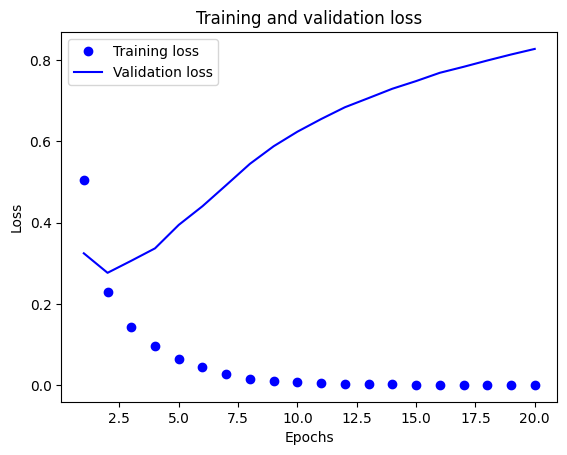

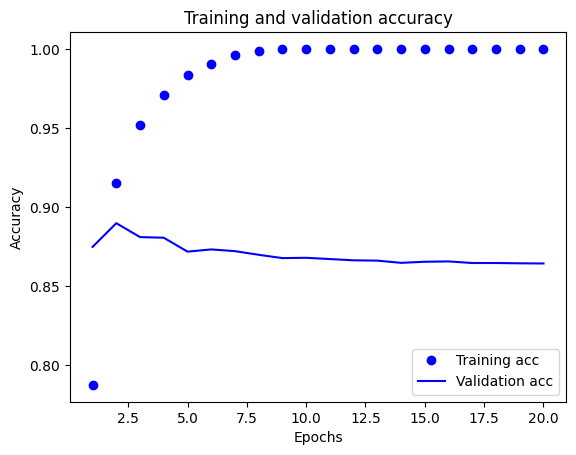

In [22]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist2 = model2.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

histp2 = hist2.history
loss_values = histp2["loss"]
val_loss_values = histp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp2["accuracy"]
val_acc = histp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3 using the MSE loss function instead of the binary_crossentropy

In [23]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.1820 - accuracy: 0.7708 - val_loss: 0.1221 - val_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0874 - accuracy: 0.9084 - val_loss: 0.0916 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0574 - accuracy: 0.9381 - val_loss: 0.0844 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0419 - accuracy: 0.9583 - val_loss: 0.0846 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0320 - accuracy: 0.9718 - val_loss: 0.0852 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0246 - accuracy: 0.9810 - val_loss: 0.0873 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0188 - accuracy: 0.9868 - val_loss: 0.0895 - val_accuracy: 0.8789
Epoch 8/20
30

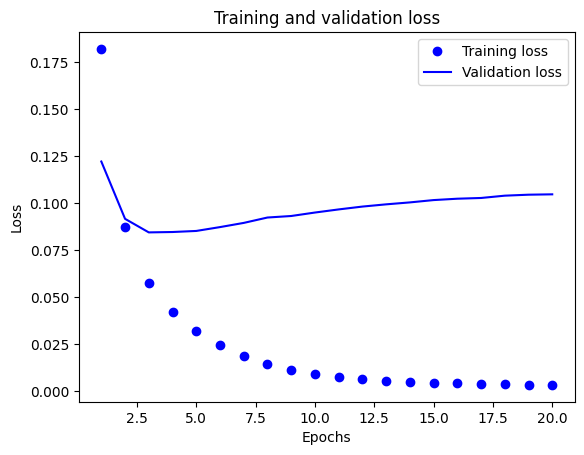

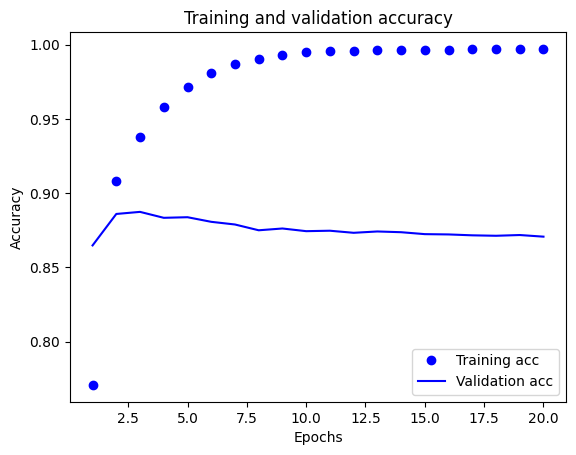

In [25]:
model3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist3 = model3.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

histp3 = hist3.history
loss_values = histp3["loss"]
val_loss_values = histp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp3["accuracy"]
val_acc = histp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Using the tanh activation instead of relu

Epoch 1/20
30/30 [==============================] - 3s 79ms/step - loss: 0.1602 - accuracy: 0.7910 - val_loss: 0.1061 - val_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0743 - accuracy: 0.9145 - val_loss: 0.0850 - val_accuracy: 0.8913
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0491 - accuracy: 0.9465 - val_loss: 0.0828 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0351 - accuracy: 0.9650 - val_loss: 0.0839 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0253 - accuracy: 0.9777 - val_loss: 0.0874 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0190 - accuracy: 0.9852 - val_loss: 0.0907 - val_accuracy: 0.8771
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0143 - accuracy: 0.9895 - val_loss: 0.0940 - val_accuracy: 0.8763
Epoch 8/20
30

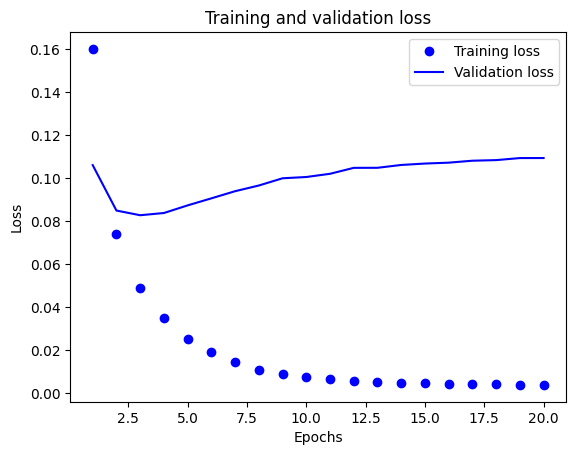

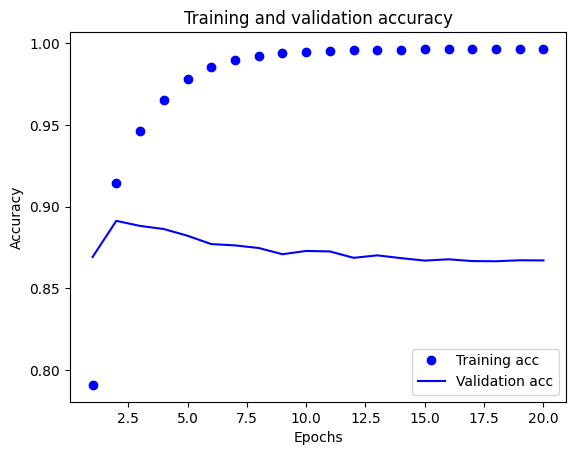

In [26]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist4 = model4.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

histp4 = hist4.history
loss_values = histp4["loss"]
val_loss_values = histp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp4["accuracy"]
val_acc = histp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

5 In the network iam using dropout technique

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist5 = model5.fit(partial_x_training,
                    partial_y_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6227 - accuracy: 0.6626 - val_loss: 0.4826 - val_accuracy: 0.8372
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4310 - accuracy: 0.8307 - val_loss: 0.3423 - val_accuracy: 0.8760
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3217 - accuracy: 0.8813 - val_loss: 0.2938 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2524 - accuracy: 0.9144 - val_loss: 0.2722 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2032 - accuracy: 0.9301 - val_loss: 0.2719 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1682 - accuracy: 0.9444 - val_loss: 0.2783 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1417 - accuracy: 0.9546 - val_loss: 0.2887 - val_accuracy: 0.8849
Epoch 8/20
30

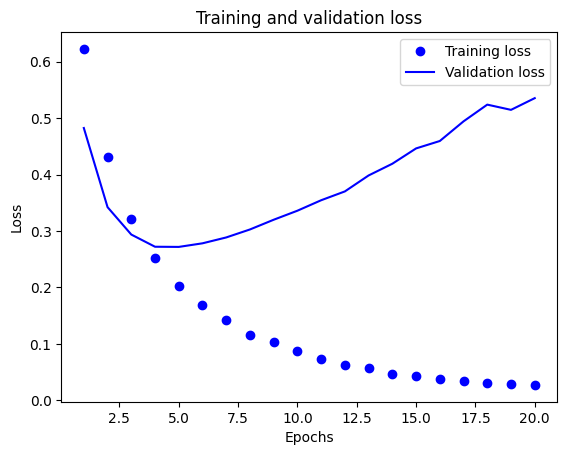

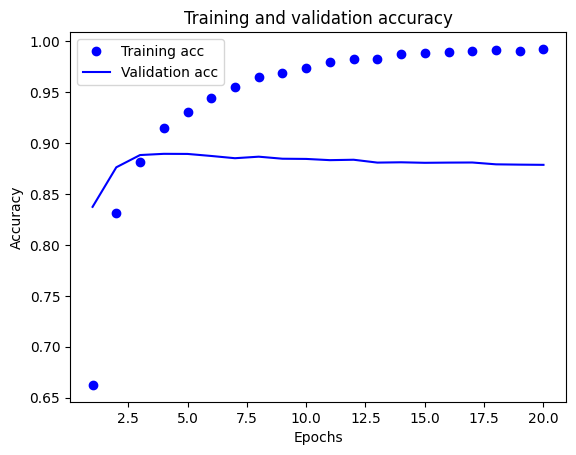

In [28]:
import matplotlib.pyplot as plt
histp5 = hist5.history
loss_values = histp5["loss"]
val_loss_values = histp5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp5["accuracy"]
val_acc = histp5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()